<a href="https://colab.research.google.com/github/shwe552001/Projects/blob/master/app%20rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
df = pd.read_csv('/content/googleplaystore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [6]:
df['Reviews'] = pd.to_numeric(df.Reviews, errors = 'coerce')

In [7]:
df.App.value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Bowmasters                                            6
Subway Surfers                                        6
Nick                                                  6
Temple Run 2                                          6
Helix Jump                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
MLB At Bat                                            5
MeetMe: Chat & Meet New People                  

In [8]:
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [9]:
df[df['Category'] == '1.9']
df = df.drop([10472])

In [10]:
df.drop_duplicates('App', keep = 'last', inplace = True)
df.App.value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook      1
Rockstars of Ooo                                    1
Angelo Rules - Crazy day                            1
Flipped Out! - Powerpuff Girls                      1
Adventure Time Game Wizard                          1
                                                   ..
Mopar Drag N Brag                                   1
Read Unlimitedly! Kids'n Books                      1
Dark Infusion Substratum Theme for Android N & O    1
Fantastic Chefs: Match 'n Cook                      1
iHoroscope - 2018 Daily Horoscope & Astrology       1
Name: App, Length: 9659, dtype: int64

In [11]:
df.Size.value_counts()

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [12]:
df['Size'][df['Size' ] == 'Varies with devices'] = np.nan

<ipython-input-12-198e8cc0efc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'][df['Size' ] == 'Varies with devices'] = np.nan


In [13]:
df['Size'] = df.Size.str.replace('M', 'e6')
df['Size'] = df.Size.str.replace('K', 'e3')

In [14]:
df['Size'] = pd.to_numeric(df['Size'], errors = 'coerce')

In [15]:
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [16]:
df.Installs.value_counts()

1,000,000+        1419
100,000+          1114
10,000+           1031
10,000,000+        933
1,000+             887
100+               709
5,000,000+         607
500,000+           504
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        204
50+                204
100,000,000+       189
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [17]:
df['Installs'] = df.Installs.str.replace('+', '')
df['Installs'] = df.Installs.str.replace(',', '')

<ipython-input-17-9898cd370ac7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df.Installs.str.replace('+', '')


In [18]:
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

In [19]:
x = df.iloc[:,3:6].values
y = df.iloc[:,2].values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [22]:
y_pred = regressor.predict(x_test)

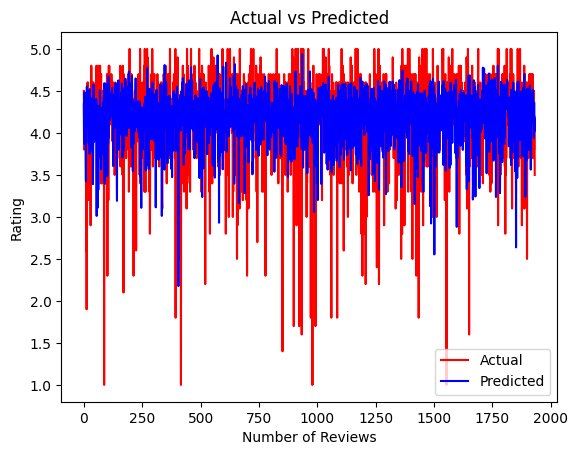

In [23]:
import matplotlib.pyplot as plt
plt.plot(y_test, color = 'red', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()